In [51]:
## Import Libraries
import pandas as pd
import numpy as np
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

## Display all rows of pandas dataframes
pd.set_option('display.max_rows', None)

In [52]:
## define ggplot colors
ggplot2_colors = ["#F8766D", "#CD9600", "#7CAE00", "#00BE67", "#00BFC4", "#00A9FF", "#C77CFF", "#FF61CC"]

# Merged File Analysis

In [8]:
## Import data
 = pd.read_csv("../../../data/bernardo/processed/02.discovery_stringency_comparison/first_half_annotation_loose.tsv",
                                     sep="\t", low_memory=False)

df_second_half_discovery = pd.read_csv("../../../data/bernardo/processed/02.discovery_stringency_comparison/second_half_annotation_loose.tsv",
                                     sep="\t", low_memory=False)

In [25]:
## Only keep useful columns
df_first_half_discovery.drop(columns=["seqname", "strand", "start", "end",
                                      "exons", "length_DNA_level", "length_transcript_level"], inplace=True)

df_second_half_discovery.drop(columns=["seqname", "strand", "start", "end", 
                                       "exons", "length_DNA_level", "length_transcript_level"], inplace=True)

In [26]:
## Count number of annotated and novel transcripts at each threshold for each sample as a sanity check

# 1 bp threshold
print("\n\nOverlapping gene discovery at 1bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["1_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 1bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["1_bp_thresh"] == "ANNOTATED"].shape[0])


# 5 bp threshold
print("\n\nOverlapping gene discovery at 5bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["5_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 5bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["5_bp_thresh"] == "ANNOTATED"].shape[0])

# 10 bp threshold
print("\n\nOverlapping gene discovery at 10bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["10_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 10bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["10_bp_thresh"] == "ANNOTATED"].shape[0])


# 20 bp threshold
print("\n\nOverlapping gene discovery at 20bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["20_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 20bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["20_bp_thresh"] == "ANNOTATED"].shape[0])


# 35 bp threshold
print("\n\nOverlapping gene discovery at 35bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["35_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 35bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["35_bp_thresh"] == "ANNOTATED"].shape[0])


## 100 bp threshold
print("\n\nOverlapping gene discovery at 100bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["100_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 100bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["100_bp_thresh"] == "ANNOTATED"].shape[0])


## 200 bp threshold
print("\n\nOverlapping gene discovery at 200bp threshold for first half is:", 
      df_first_half_discovery.loc[df_first_half_discovery["200_bp_thresh"] == "ANNOTATED"].shape[0])

print("\nOverlapping gene discovery at 200bp threshold for second half is:", 
      df_second_half_discovery.loc[df_second_half_discovery["200_bp_thresh"] == "ANNOTATED"].shape[0])


## Total number of novel transcript/genes in each file
print("\n\nTotal number of discovered genes/transcript in first half:", df_first_half_discovery.shape[0])

print("\nTotal number of discovered genes/transcript in second half:", df_second_half_discovery.shape[0])



Overlapping gene discovery at 1bp threshold for first half is: 2899

Overlapping gene discovery at 1bp threshold for second half is: 2858


Overlapping gene discovery at 5bp threshold for first half is: 4285

Overlapping gene discovery at 5bp threshold for second half is: 4209


Overlapping gene discovery at 10bp threshold for first half is: 5100

Overlapping gene discovery at 10bp threshold for second half is: 5027


Overlapping gene discovery at 20bp threshold for first half is: 5863

Overlapping gene discovery at 20bp threshold for second half is: 5793


Overlapping gene discovery at 35bp threshold for first half is: 6452

Overlapping gene discovery at 35bp threshold for second half is: 6359


Overlapping gene discovery at 100bp threshold for first half is: 7733

Overlapping gene discovery at 100bp threshold for second half is: 7613


Overlapping gene discovery at 200bp threshold for first half is: 9281

Overlapping gene discovery at 200bp threshold for second half is: 9145


Tota

In [32]:
## Read NDR data

df_first_half_ndr = pd.read_csv("../../../data/bernardo/processed/02.discovery_stringency_comparison/uky_firstHalf_loose_ndr.tsv",
                                sep="\t", names=["transcript_id", "gene_id", "NDR"],
                                usecols=[0, 1, 2], header=0)

df_second_half_ndr = pd.read_csv("../../../data/bernardo/processed/02.discovery_stringency_comparison/uky_secondHalf_loose_ndr.tsv",
                                 sep="\t", names=["transcript_id", "gene_id", "NDR"],
                                usecols=[0, 1, 2], header=0)

In [33]:
## Merge ndr and overlap files for each half

df_first_half = pd.merge(df_first_half_discovery, df_first_half_ndr, how="inner", 
                        on=["gene_id", "transcript_id"])

df_second_half = pd.merge(df_second_half_discovery, df_second_half_ndr, how="inner", 
                        on=["gene_id", "transcript_id"])

In [38]:
df_first_half.tail()

,gene_id,transcript_id,1_bp_thresh,5_bp_thresh,10_bp_thresh,20_bp_thresh,35_bp_thresh,50_bp_thresh,100_bp_thresh,200_bp_thresh,NDR
34336,ENSG00000172297,BambuTx18371,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,0.533980
34337,ENSG00000215506,BambuTx18372,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,0.448537
34338,BambuGene29497,BambuTx10660,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,0.576288
34339,BambuGene29499,BambuTx10661,Overlapping,Overlapping,Overlapping,Overlapping,Overlapping,Overlapping,Overlapping,Overlapping,0.121938
34340,BambuGene29466,BambuTx27121,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,Divergent,0.432519


In [34]:
## Improve name of variables

df_first_half.replace("ANNOTATED", "Overlapping", inplace=True)
df_first_half.replace("NOVEL", "Divergent", inplace=True)


df_second_half.replace("ANNOTATED", "Overlapping", inplace=True)
df_second_half.replace("NOVEL", "Divergent", inplace=True)

In [47]:
## Get percent overlap for each NDR threshold

## Create list that will hold NDR valued
list_ndr = []

## Create lists to hold proportion of overlap for each threshold
## index 0 to 6 in as follows: "1_bp_thresh", "5_bp_thresh", "10_bp_thresh", "20_bp_thresh", "35_bp_thresh", "100_bp_thresh", "200_bp_thresh"
list_prop_overlap = [[], [], [], [], [], [], []]
list_prop_overlap_gene = [[], [], [], [], [], [], []]
list_prop_overlap_transcript = [[], [], [], [], [], [], []]

## Create list of bp overlap to be called the same transcript
list_thresholds = ["1_bp_thresh", "5_bp_thresh", "10_bp_thresh", "20_bp_thresh", "35_bp_thresh", "100_bp_thresh", "200_bp_thresh"]

for i in range(len(list_thresholds)):
    
    thresh = list_thresholds[i]

    for k in range(100, 0, -1):

        j = k/100

        df_first = df_first_half.loc[df_first_half["NDR"] <= j].copy()
        df_second = df_second_half.loc[df_second_half["NDR"] <= j].copy()

        df_first_gene = df_first.loc[df_first["gene_id"].str.contains("BambuGene")].copy()
        df_first_transcripts = df_first.loc[~df_first["gene_id"].str.contains("BambuGene")].copy()

        df_second_gene = df_second.loc[df_second["gene_id"].str.contains("BambuGene")].copy()
        df_second_transcripts = df_second.loc[~df_second["gene_id"].str.contains("BambuGene")].copy()

        first_overlapping = df_first.loc[df_first[thresh] == "Overlapping"].shape[0]/df_first.shape[0]
        second_overlapping = df_second.loc[df_second[thresh] == "Overlapping"].shape[0]/df_second.shape[0]

        first_prop_overlapping_gene = df_first_gene.loc[df_first_gene[thresh] == "Overlapping"].shape[0]/df_first_gene.shape[0]
        second_prop_overlapping_gene = df_second_gene.loc[df_second_gene[thresh] == "Overlaping"].shape[0]/df_second_gene.shape[0]

        first_prop_overlapping_transcript = df_first_transcripts.loc[df_first_transcripts[thresh] == "Overlapping"].shape[0]/df_first_transcripts.shape[0]
        second_prop_overlapping_transcript = df_second_transcripts.loc[df_second_transcripts[thresh] == "Overlapping"].shape[0]/df_second_transcripts.shape[0]

        overlap_pro= round(((first_overlapping + second_overlapping)/2), 3)
        overlap_pro_gene = round(((first_prop_overlapping_gene + second_prop_overlapping_gene)/2), 3)
        overlap_pro_transcript = round(((first_prop_overlapping_transcript + second_prop_overlapping_transcript)/2), 3)
        
        if i == 0:
            list_ndr.append(j)
        
        list_prop_overlap[i].append(overlap_pro)
        list_prop_overlap_gene[i].append(overlap_pro_gene)
        list_prop_overlap_transcript[i].append(overlap_pro_transcript)

# Make figures

In [48]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,8
rcParams.update({'font.size': 28})
rcParams['axes.linewidth'] = 6

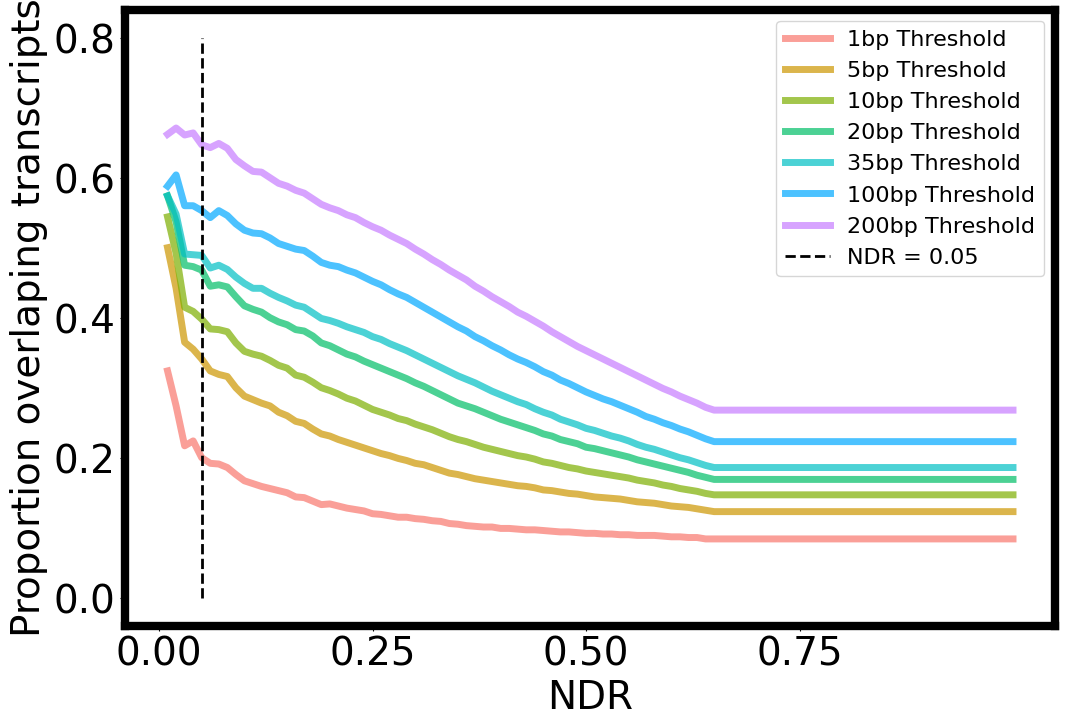

In [73]:
## Make plot comparing merged and CSHL vs UKY overlap at different thresholds.

plt.plot(list_ndr, list_prop_overlap[0], color=ggplot2_colors[0], label="1bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[1], color=ggplot2_colors[1], label="5bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[2], color=ggplot2_colors[2], label="10bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[3], color=ggplot2_colors[3], label="20bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[4], color=ggplot2_colors[4], label="35bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[5], color=ggplot2_colors[5], label="100bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap[6], color=ggplot2_colors[6], label="200bp Threshold", linewidth=5, alpha=0.7)

plt.plot([0.05, 0.05], [0.00, 0.8], color="black", label="NDR = 0.05", linewidth=2, alpha=1, linestyle='dashed')


plt.xticks(np.arange(0, 1, step=0.25))
plt.xticks(np.arange(0, 1, step=0.25))
plt.xlabel('NDR')
plt.ylabel('Proportion overlaping transcripts')
plt.legend(loc="upper right", fontsize=16)
plt.savefig('../../../figures/bernardo/02.discovery_stringency_comparison/stringency_comparison/ndr_all_overlap.png', dpi=300, transparent=True, bbox_inches="tight")
plt.show()

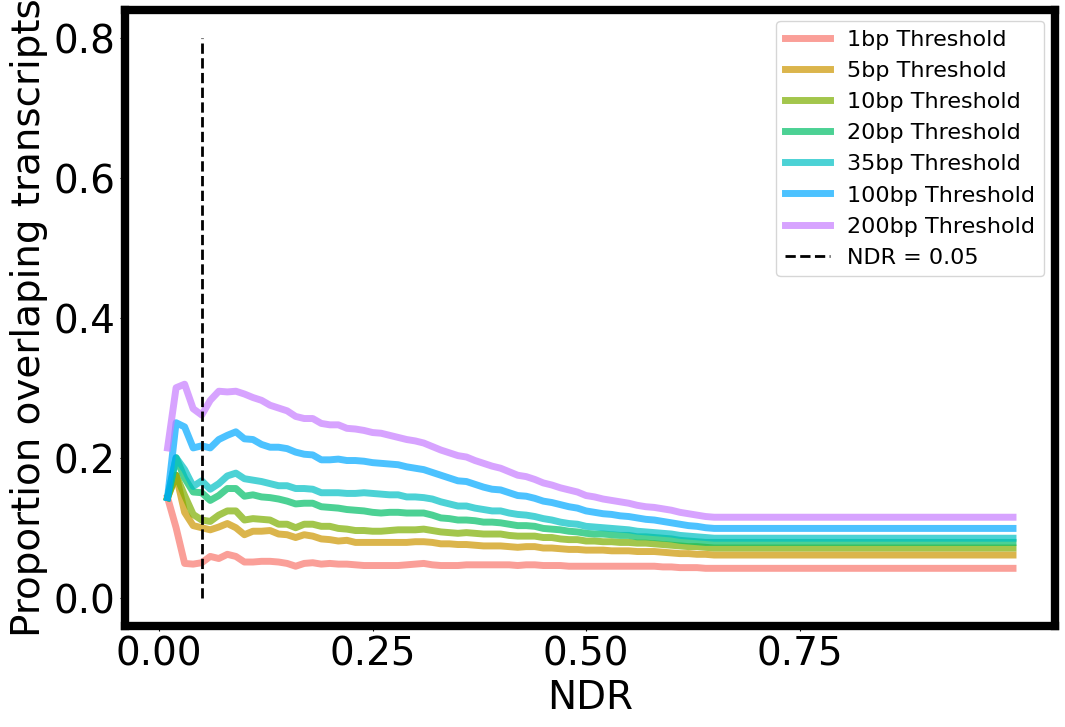

In [72]:
## Make plot comparing merged and CSHL vs UKY overlap at different thresholds.

plt.plot(list_ndr, list_prop_overlap_gene[0], color=ggplot2_colors[0], label="1bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[1], color=ggplot2_colors[1], label="5bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[2], color=ggplot2_colors[2], label="10bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[3], color=ggplot2_colors[3], label="20bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[4], color=ggplot2_colors[4], label="35bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[5], color=ggplot2_colors[5], label="100bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_gene[6], color=ggplot2_colors[6], label="200bp Threshold", linewidth=5, alpha=0.7)

plt.plot([0.05, 0.05], [0.00, 0.8], color="black", label="NDR = 0.05", linewidth=2, alpha=1, linestyle='dashed')


plt.xticks(np.arange(0, 1, step=0.25))
plt.xticks(np.arange(0, 1, step=0.25))
plt.xlabel('NDR')
plt.ylabel('Proportion overlaping transcripts')
plt.legend(loc="upper right", fontsize=16)
plt.savefig('../../../figures/bernardo/02.discovery_stringency_comparison/stringency_comparison/ndr_gene_overlap.png', dpi=300, transparent=True, bbox_inches="tight")
plt.show()

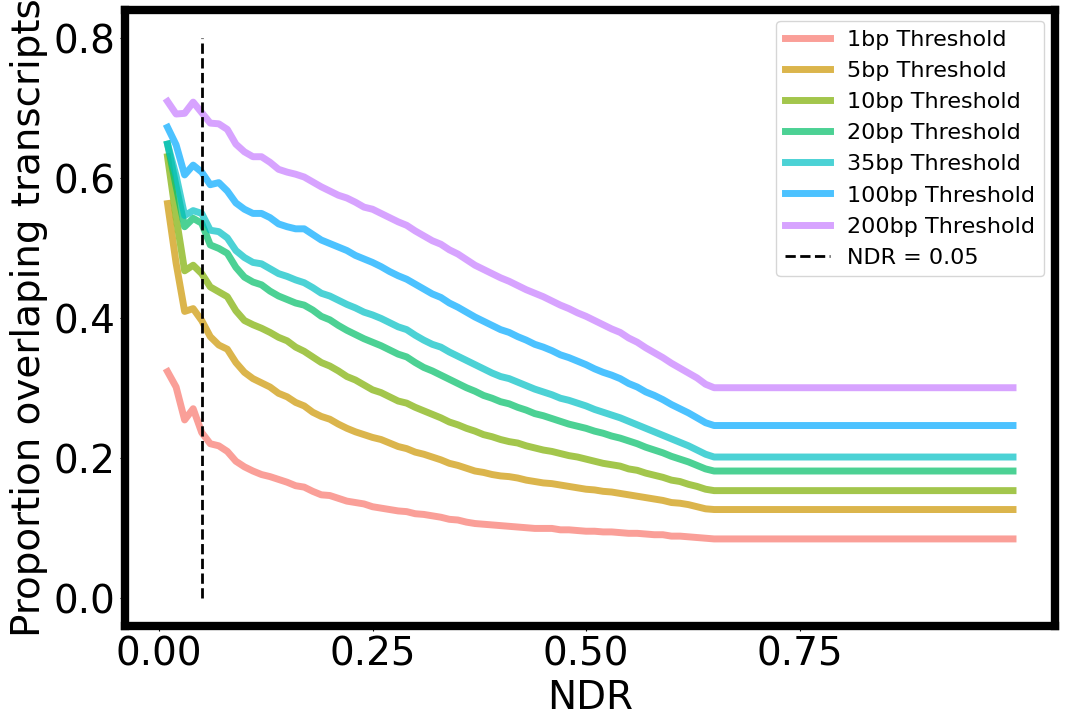

In [71]:
## Make plot comparing merged and CSHL vs UKY overlap at different thresholds.

plt.plot(list_ndr, list_prop_overlap_transcript[0], color=ggplot2_colors[0], label="1bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[1], color=ggplot2_colors[1], label="5bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[2], color=ggplot2_colors[2], label="10bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[3], color=ggplot2_colors[3], label="20bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[4], color=ggplot2_colors[4], label="35bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[5], color=ggplot2_colors[5], label="100bp Threshold", linewidth=5, alpha=0.7)
plt.plot(list_ndr, list_prop_overlap_transcript[6], color=ggplot2_colors[6], label="200bp Threshold", linewidth=5, alpha=0.7)

plt.plot([0.05, 0.05], [0.00, 0.8], color="black", label="NDR = 0.05", linewidth=2, alpha=1, linestyle='dashed')


plt.xticks(np.arange(0, 1, step=0.25))
plt.xticks(np.arange(0, 1, step=0.25))
plt.xlabel('NDR')
plt.ylabel('Proportion overlaping transcripts')
plt.legend(loc="upper right", fontsize=16)
plt.savefig('../../../figures/bernardo/02.discovery_stringency_comparison/stringency_comparison/ndr_transcripts_overlap.png', dpi=300, transparent=True, bbox_inches="tight")
plt.show()